In [2]:
#package
using Distributions
using Random
using LinearAlgebra
using Plots
using StatsBase
using LaTeXStrings
using DataFrames
using CSV
using Base.Threads
using HDF5
gr()

Plots.GRBackend()

1次元の自由エネルギー変化

In [1]:
# spc単体の自由エネルギー
spc_free_energy = [
    -1466.1041583683038,
    -1061.175874262832,
    -701.7032861930813,
    -306.00139058101297,
    96.09165322015994,
]

5-element Vector{Float64}:
 -1466.1041583683038
 -1061.175874262832
  -701.7032861930813
  -306.00139058101297
    96.09165322015994

In [35]:
chi_free_energy = 500.51824803436455

500.51824803436455

In [36]:
sum_free_energy = spc_free_energy .+ chi_free_energy

5-element Vector{Float64}:
 -965.5859103339393
 -560.6576262284674
 -201.1850381587168
  194.51685745335158
  596.6099012545245

In [3]:
spc_noise_list = [
    10^(-2.5),
    10^(-2.0),
    10^(-1.5),
    10^(-1.0),
    10^(-0.5)
]

5-element Vector{Float64}:
 0.0031622776601683794
 0.010000000000000002
 0.03162277660168379
 0.1
 0.31622776601683794

In [74]:
# spc単体の自由エネルギー
int_free_energy = [
    -983.8166769522084,
    -565.1503185092399,
    -183.0449081866446,
    216.13820080467298,
    653.623483713163,
]

5-element Vector{Float64}:
 -983.8166769522084
 -565.1503185092399
 -183.0449081866446
  216.13820080467298
  653.623483713163

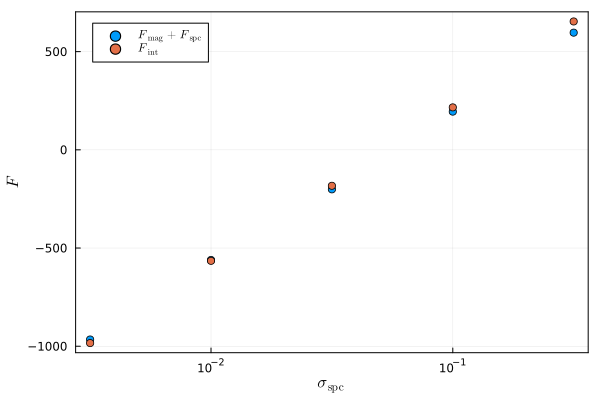

In [75]:
plot(
    spc_noise_list,
    sum_free_energy,
    st = :scatter,
    label = L"F_{\mathrm{mag}}+F_{\mathrm{spc}}",
    xlabel=L"\sigma_{\mathrm{spc}}",
    ylabel=L"F",
    xscale=:log10,
    framestyle = :box,
    #title = L"\sigma_{\mathrm{mag}}=10^(0.0)}",
    #title = L"\sigma_{mag}=10^(0.0)}",
)

plot!(
    spc_noise_list,
    int_free_energy,
    st = :scatter,
    label = L"F_{\mathrm{int}}",
    #xlabel=L"\sigma_{\mathrm{spc}}",
    #ylabel=L"F",
    #xscale=:log10,
    #framestyle = :box,
    #title = L"\sigma_{\mathrm{mag}}=10^(0.0)}",
    #title = L"\sigma_{mag}=10^(0.0)}",
)

In [12]:
chi_noise_list = [
    10^(-1.0),
    10^(-0.5),
    10^(0.0),
    10^(0.5),
    10^(1.0)
]

5-element Vector{Float64}:
  0.1
  0.31622776601683794
  1.0
  3.1622776601683795
 10.0

In [76]:
dif = int_free_energy - sum_free_energy

5-element Vector{Float64}:
 -18.230766618269058
  -4.4926922807725305
  18.140129972072202
  21.6213433513214
  57.01358245863844

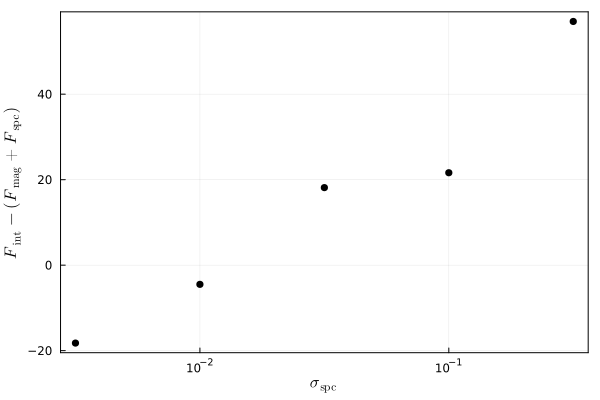

In [77]:
plot(
    spc_noise_list,
    dif,
    st = :scatter,
    label = "",
    xlabel=L"\sigma_{\mathrm{spc}}",
    ylabel=L"F_{\mathrm{int}}-(F_{\mathrm{mag}}+F_{\mathrm{spc}})",
    xscale=:log10,
    framestyle = :box,
    color = :black,
    #title = L"\sigma_{\mathrm{mag}}=10^(0.0)}",
    #title = L"\sigma_{mag}=10^(0.0)}",
)

In [31]:
free_dif = z(5,5)

5×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [81]:
free_dif[3,:] = dif

5-element Vector{Float64}:
 -18.230766618269058
  -4.4926922807725305
  18.140129972072202
  21.6213433513214
  57.01358245863844

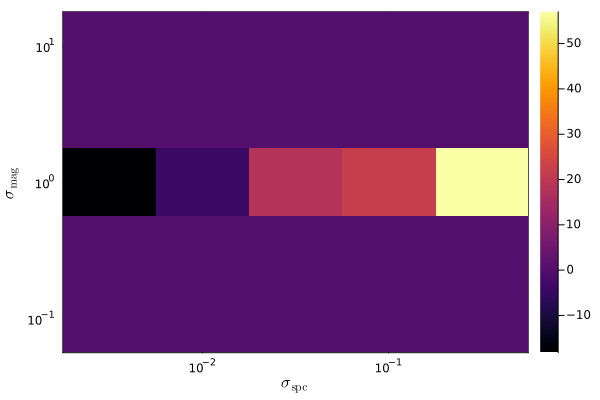

In [88]:
plot(
    spc_noise_list,
    chi_noise_list,
    free_dif,
    st=:heatmap,
    label = L"F_{\mathrm{mag}}+F_{\mathrm{spc}}",
    xlabel=L"\sigma_{\mathrm{spc}}",
    ylabel=L"\sigma_{\mathrm{mag}}",
    xscale=:log10,
    yscale=:log10,
    framestyle = :box,
    #title = L"\sigma_{\mathrm{mag}}=10^(0.0)}",
    #title = L"\sigma_{mag}=10^(0.0)}",
)

In [43]:
int1 = h5open("/Users/nishimura/home/lab/exmc/result/int/spc1_chi3_B40.h5", "r") do file
    read(file, "B40")
end;

In [47]:
spc1 = h5open("/Users/nishimura/home/lab/exmc/result/spc/spc1_B40.h5", "r") do file
    read(file, "B40")
end;

In [56]:
chi3 = h5open("/Users/nishimura/home/lab/exmc/result/chi/chi3_B40.h5", "r") do file
    read(file, "B40")
end;

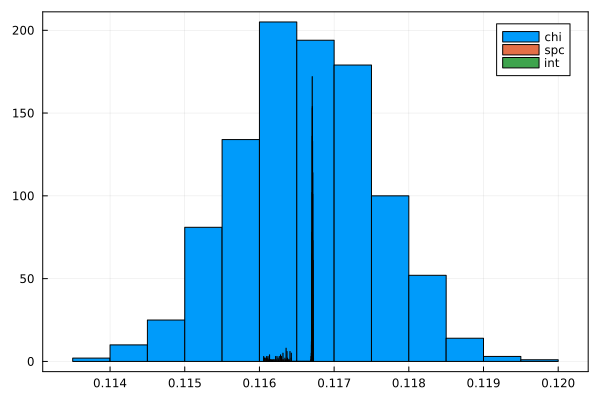

In [58]:
plot(
    chi3[:,end],
    st = :histogram,
    label="chi",
)
plot!(
    spc1[:,end],
    st = :histogram,
    label="spc",
)
plot!(
    int1[:,end],
    st = :histogram,
    framestyle = :box,
    label="int",
)



In [68]:
int3 = h5open("/Users/nishimura/home/lab/exmc/result/int/spc3_chi3_B40.h5", "r") do file
    read(file, "B40")
end;

In [69]:
spc3 = h5open("/Users/nishimura/home/lab/exmc/result/spc/spc3_B40.h5", "r") do file
    read(file, "B40")
end;

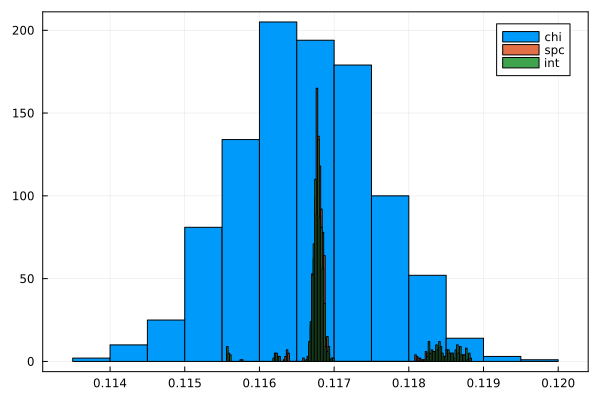

In [70]:
plot(
    chi3[:,end],
    st = :histogram,
    label="chi",
)
plot!(
    spc3[:,end],
    st = :histogram,
    label="spc",
)
plot!(
    int3[:,end],
    st = :histogram,
    framestyle = :box,
    label="int",
)



In [71]:
int4 = h5open("/Users/nishimura/home/lab/exmc/result/int/spc4_chi3_B40.h5", "r") do file
    read(file, "B40")
end;

In [72]:
spc4 = h5open("/Users/nishimura/home/lab/exmc/result/spc/spc4_B40.h5", "r") do file
    read(file, "B40")
end;

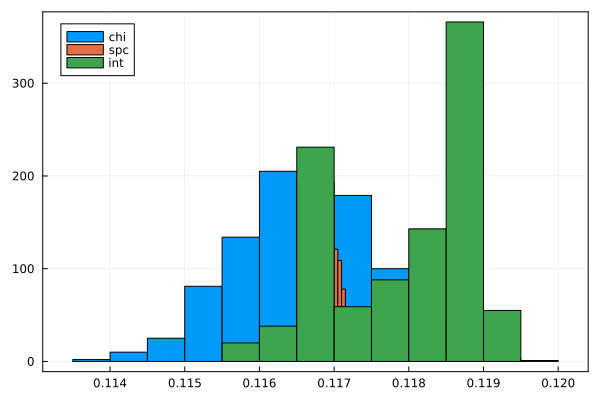

In [73]:
plot(
    chi3[:,end],
    st = :histogram,
    label="chi",
)
plot!(
    spc4[:,end],
    st = :histogram,
    label="spc",
)
plot!(
    int4[:,end],
    st = :histogram,
    framestyle = :box,
    label="int",
)

